# Pymaceuticals Inc.
---

### Analysis

- There are total 10 Drug regimens which got tested on mice to see which drug would work the best on the tumors. out of those 10 we have used 4 drugs to observe on mice.Which are Capomulin , Ramicane , Infubinol and Ceftamin.
- Capomulin was used on 230 mice. Ramicane was used on 228 mice. Infubinol was used on 178 mice.Ceftamin was used on 178 mice. From the given dataset it is clear that, Capomulin works the best to reduce the tumor growth.

- The positive correlation exists between Capomulin mices' weight and tumor volume which is 0.84. It is a strong positive correlation (which is >= 0.7), when the mouse weight increases the average tumor volume also tends  increases. 

- The regression analysis helped to understand how much the average tumor volume(y = dependent var.) will change when weight(x = independent var.) of mice change. The R-squared value is 0.71. The model explains 71% of the fitted data in the regression model. When, R- squared value is high, it suggests a better fit for the model.  

- There is one outlier for Infubinol Regimen. For most mice the volume of Tumor tends to increase whereas for this one mouse the Tumor got decreased.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(study_results,mouse_metadata,on=["Mouse ID","Mouse ID"],how="left")
combine_df
# ------------------------------------------------------------------------------------------------------------------
# To The Grading Team : I have maped the ["Tumor Volumne(mm3)"] to appear as suggested and it works great but
# I have commented that out so that I can get the full values of the #s for further analysis.
# ------------------------------------------------------------------------------------------------------------------
# Display the data table for preview
#combine_df["Tumor Volume (mm3)"] = combine_df["Tumor Volume (mm3)"].map("{:,.1f}".format)
combine_df
#combine_df.shape

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combine_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = combine_df.loc[combine_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup_mice_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = combine_df.loc[combine_df["Mouse ID"]=="g989"]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df["Mouse ID"].isin(dup_mice_df)== False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_df = clean_df["Mouse ID"].nunique()
clean_num_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

summary_stat1 = pd.DataFrame({"Mean Tumor Volume" : mean,
                                 "Median Tumor Volume" : median,
                                 "Tumor Volume Variance" : var,
                                 "Tumor Volume Std. Dev." : std,
                                 "Tumor Volume Std. Err." : sem})

summary_stat1
 



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stat2 =  clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std" , "sem" ]})
summary_stat2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

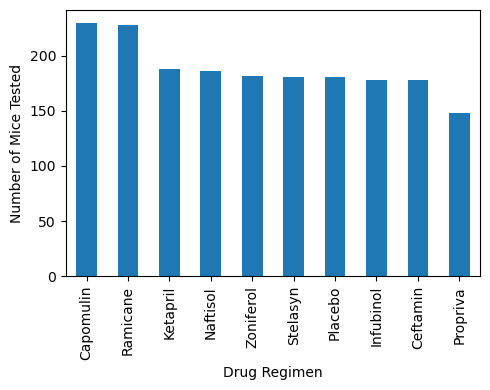

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts()

plt.figure(figsize=(5,4))
plot_pandas = mice_count.plot(kind="bar", alpha=1)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()
mice_count

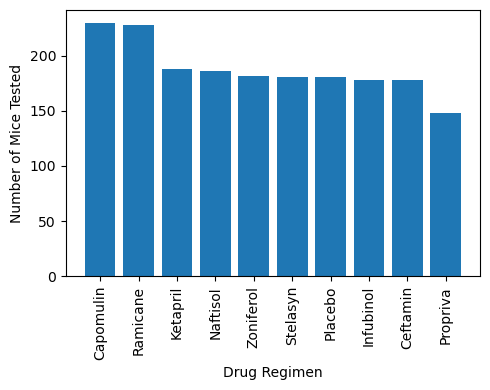

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index
y_axis = mice_count.values

plt.figure(figsize=(5,4))
plt.bar(x_axis , y_axis , alpha=1 ,align="center")
plt.xticks( rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

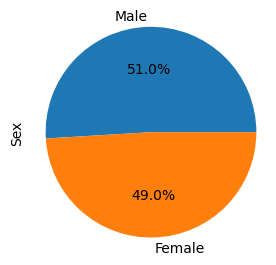

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_plot_pandas = clean_df["Sex"].value_counts()

plt.figure(figsize=(3,3))
pie_pandas = gender_plot_pandas.plot(kind="pie",autopct="%.1f%%" )
pie_pandas.set_ylabel("Sex")
plt.axis("equal")
plt.show()

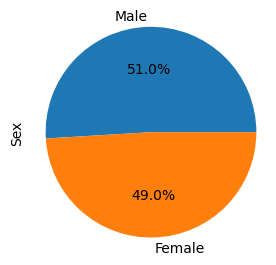

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

members = gender_plot_pandas.values
labels = gender_plot_pandas.index

plt.figure(figsize=(3,3))
plt.pie(members, labels=labels , autopct="%.1f%%" )
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drug = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") | (clean_df["Drug Regimen"]=="Ramicane") | \
                        (clean_df["Drug Regimen"]=="Infubinol") | (clean_df["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
four_drug = four_drug.groupby("Mouse ID").max()["Timepoint"]
four_drug_df = pd.DataFrame(four_drug)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
two_df = pd.merge(four_drug_df, clean_df, on=["Mouse ID" , "Timepoint"], how="left")


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [15]:
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_last_df = pd.DataFrame(Capomulin_last)

Capomulin_merge = pd.merge(Capomulin_last_df, clean_df, on=["Mouse ID","Timepoint"],how="left")
Capomulin_merge.head()

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Ramicane

Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_last_df = pd.DataFrame(Ramicane_last)

Ramicane_merge = pd.merge(Ramicane_last_df, clean_df, on=["Mouse ID" , "Timepoint"], how="left")
Ramicane_merge.head()

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 31.56046955
The upper quartile of Capomulin tumors: 40.65900627
The interquartile range of Capomulin tumors: 9.098536719999998
The median of Capomulin tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
# Infubinol

Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_last_df = pd.DataFrame(Infubinol_last)

Infubinol_merge = pd.merge(Infubinol_last_df, clean_df, on=["Mouse ID" , "Timepoint"], how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 54.04860769
The upper quartile of Capomulin tumors: 65.52574285
The interquartile range of Capomulin tumors: 11.477135160000003
The median of Capomulin tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# Ceftamin

Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_last_df = pd.DataFrame(Ceftamin_last)

Ceftamin_merge = pd.merge(Ceftamin_last_df, clean_df,on=["Mouse ID" , "Timepoint"], how="left" )
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 48.72207785
The upper quartile of Capomulin tumors: 64.29983003
The interquartile range of Capomulin tumors: 15.577752179999997
The median of Capomulin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


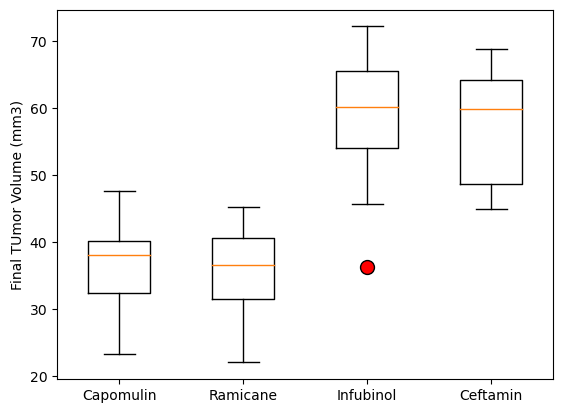

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

box_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
drugs = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]

fg1,ax1 = plt.subplots()
ax1.set_ylabel("Final TUmor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none', markeredgecolor='black')
ax1.boxplot(box_plot, labels=drugs, widths=0.5, vert=True, flierprops=flierprops )
plt.show()

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
# ------------------------------------------------------------------------------------------------------------------
# To The Grading Team : I have chosen "two_df" which is a merge of clean_df(No duplicats) DataFrame and 
# four_df DataFrame (includes :"Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin" ) and in that DataFrame(two_df) the drug 
# "Infubinol" comes as the index position [15] and that is the reason why i get outlie at the position [15] compare to
# the solution where it is at position [31]. I chose two_df to optimize the the time and resources becouse we are only analyzing 
# four drugs so there is no point of loading the data of all the 10 drugs to the new DataFrame.
# ------------------------------------------------------------------------------------------------------------------
drug_list = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]

tumor_vol_list = []

for drug in drug_list:
    tumor_vol = two_df.loc[two_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers : {outliers}")


Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


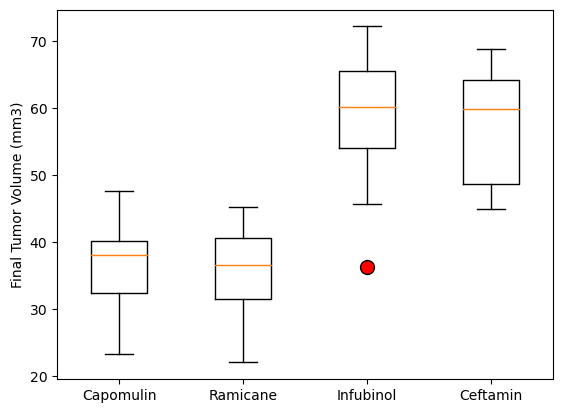

In [21]:
drug_list = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none', markeredgecolor='black')
plt.boxplot(tumor_vol_list,flierprops=flierprops)
plt.xticks([1,2,3,4], drug_list, rotation="horizontal")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

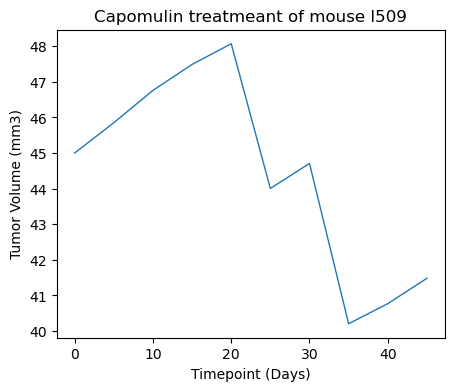

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509", :]
#print(line_df.head())
x_axis = line_df["Timepoint"]
tumer_size = line_df["Tumor Volume (mm3)"]
plt.figure(figsize=(5,4))
plt.plot(x_axis, tumer_size, linewidth=1)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

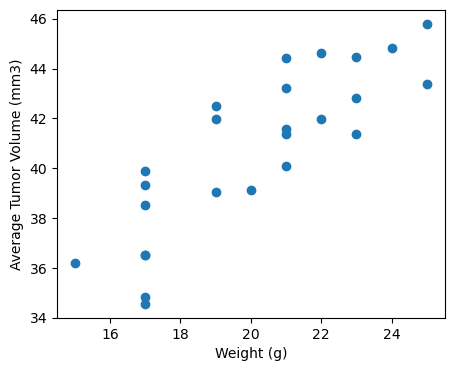

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.figure(figsize=(5,4))
plt.scatter(capomulin_avg["Weight (g)"] , capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.71


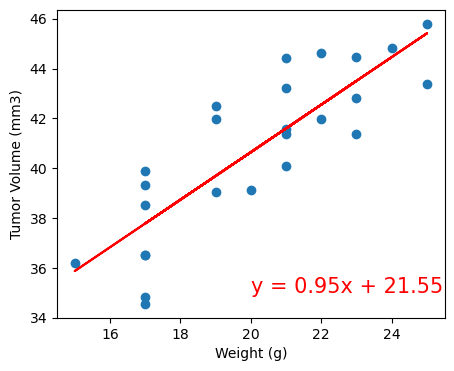

In [25]:
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(5,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()

# Thank You.